In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
df=pd.read_csv('https://github.com/rishitdass/Data-analysis-on-Plane-Crash/blob/8778abda2a40fb9d4694e7e9d654d792dd449419/Airplane_Crashes_and_Fatalities_Since_1908.csv?raw=true')

In [5]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


#Data Cleaning

In [6]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [7]:
df.isnull().sum()/len(df) *100

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

In [8]:
df=df.drop('Flight #',axis='columns')
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Route         3562 non-null   object 
 5   Type          5241 non-null   object 
 6   Registration  4933 non-null   object 
 7   cn/In         4040 non-null   object 
 8   Aboard        5246 non-null   float64
 9   Fatalities    5256 non-null   float64
 10  Ground        5246 non-null   float64
 11  Summary       4878 non-null   object 
dtypes: float64(3), object(9)
memory usage: 494.0+ KB


In [10]:
df.shape

(5268, 12)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [13]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Registration',
       'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [14]:
df['Survived']=df['Aboard']-df['Fatalities']

In [15]:
df.Ground.value_counts()

0.0       5027
1.0         53
2.0         27
3.0         21
4.0         15
5.0         10
8.0         10
7.0          8
11.0         6
6.0          6
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
12.0         2
19.0         2
47.0         2
52.0         2
70.0         2
54.0         1
18.0         1
45.0         1
16.0         1
35.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
15.0         1
32.0         1
49.0         1
9.0          1
40.0         1
36.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: Ground, dtype: int64

In [16]:
df[df.Ground == 2750.0]

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived
4803,09/11/2001,08:47,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,0.0
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,0.0


In [17]:
df.Time.value_counts()

15:00    32
12:00    31
11:00    29
19:30    26
16:00    26
         ..
19:37     1
19:18     1
07:54     1
13:49     1
15:32     1
Name: Time, Length: 1005, dtype: int64

In [18]:
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00')

<ipython-input-18-4f5876e61f56>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('18.40', '18:40')


In [19]:
df['Time'] = df['Time'].fillna('00:00')

In [20]:
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [21]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,09/17/1908 17:18
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,07/12/1912 06:30
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,08/06/1913 00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,09/09/1913 18:30
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,10/17/1913 10:30


In [22]:
df.DateTime=pd.to_datetime(df.DateTime)

#Visualization

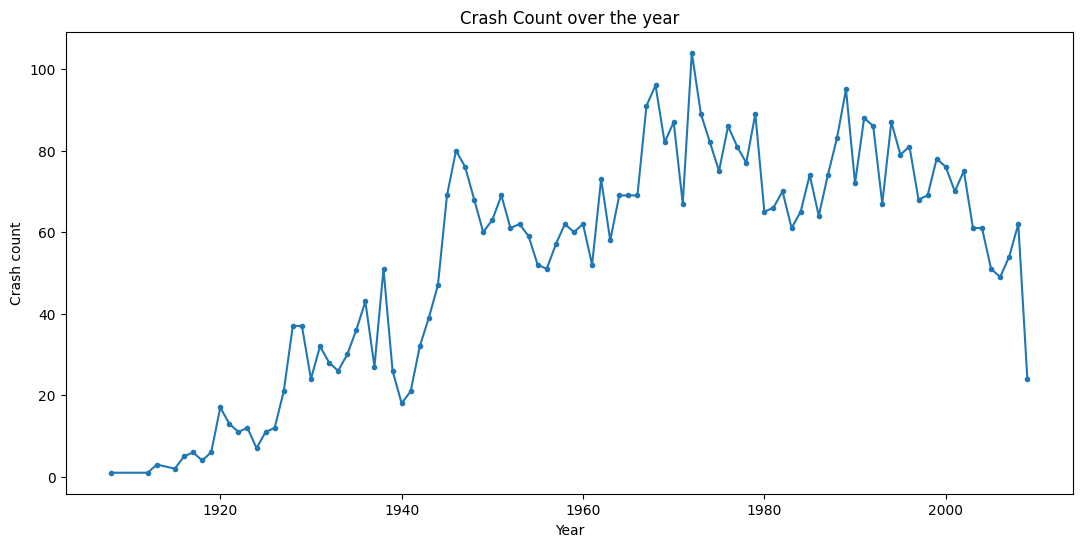

In [69]:
year=df.groupby(df.DateTime.dt.year)[['Time']].count()
plt.figure(figsize=(13,6))
plt.plot(year.index,year.Time,marker='.')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.title("Crash Count over the year")
plt.show()

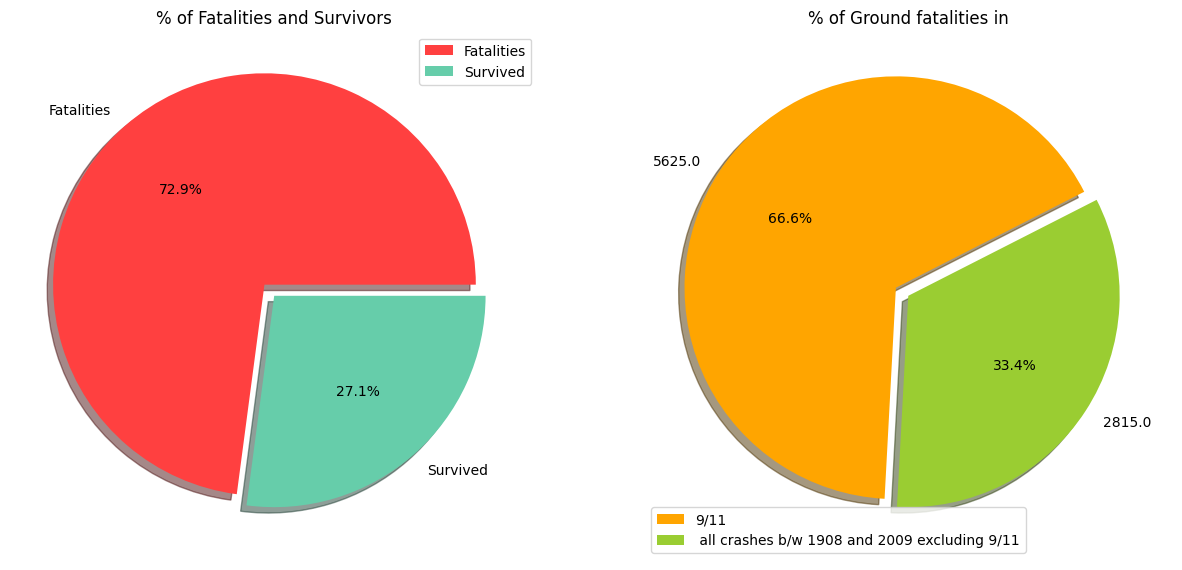

In [77]:
Fatalities=df.Fatalities.sum()
Survived=df.Survived.sum()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
pieplot=[Fatalities,Survived]
labels=['Fatalities','Survived']
plt.pie(pieplot,labels=labels,autopct="%1.1f%%",explode=(0.07,0),shadow=True,colors=['#FF4040', '#66CDAA'])
plt.title("% of Fatalities and Survivors")
plt.legend(["Fatalities","Survived"])

plt.subplot(1,2,2)
df_911=df[(df.DateTime.dt.day == 11) & (df.DateTime.dt.month ==9) & (df.DateTime.dt.year==2001)]
df_remain=df[~((df.DateTime.dt.day == 11) & (df.DateTime.dt.month ==9) & (df.DateTime.dt.year==2001))]
plt.title("% of Ground fatalities in")
label=[df_911.Ground.sum(),df_remain.Ground.sum()]
plt.pie([df_911.Ground.sum(),df_remain.Ground.sum()],labels=label,autopct="%1.1f%%",shadow=True,startangle=27,explode=(0.07,0),colors=["orange","yellowgreen"])
plt.legend(["9/11"," all crashes b/w 1908 and 2009 excluding 9/11"])

<ipython-input-26-b7d7373c6689>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum=df.groupby(df.DateTime.dt.year).sum()


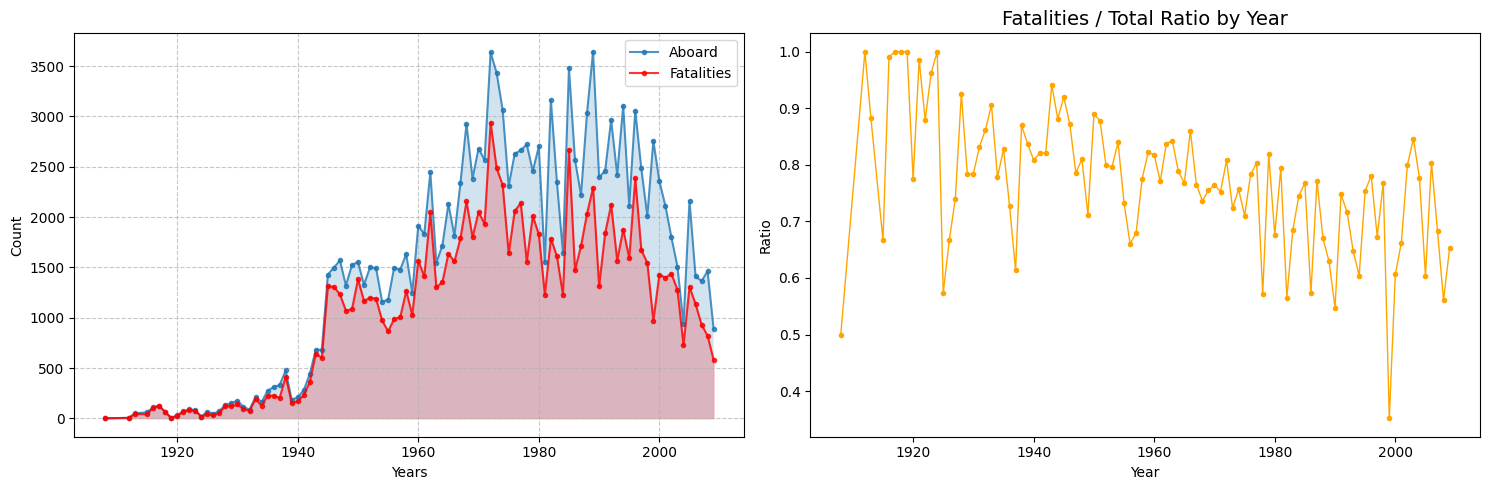

In [26]:

sum=df.groupby(df.DateTime.dt.year).sum()
sum["Proportion"]=sum["Fatalities"]/sum["Aboard"]
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xlabel("Years")
plt.ylabel("Count")
plt.plot(sum.index,sum.Aboard,marker=".",alpha=0.8)
plt.plot(sum.index,sum.Fatalities,marker=".",color="red",alpha=0.8)
plt.fill_between(sum.index,sum.Aboard,alpha=0.2)
plt.fill_between(sum.index,sum.Fatalities,color="red",alpha=0.2)
plt.legend(["Aboard","Fatalities"])
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1,2,2)
plt.plot(sum.index,sum.Proportion,marker=".",linewidth=1,color="orange")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   object        
 1   Time          5268 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Route         3562 non-null   object        
 5   Type          5241 non-null   object        
 6   Registration  4933 non-null   object        
 7   cn/In         4040 non-null   object        
 8   Aboard        5246 non-null   float64       
 9   Fatalities    5256 non-null   float64       
 10  Ground        5246 non-null   float64       
 11  Summary       4878 non-null   object        
 12  Survived      5246 non-null   float64       
 13  DateTime      5268 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 576.3+ KB


<ipython-input-28-a92c308c6995>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y=operate.index ,x="count",data=operate,orient='h',palette="gist_heat")


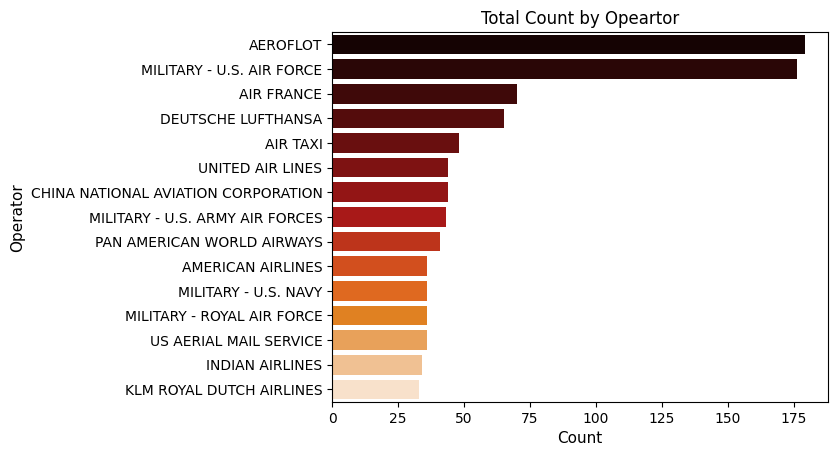

In [28]:
df.Operator=df.Operator.str.upper()
df.Operator=df.Operator.replace("A B AEROTRANSPORT","AB AEROTRANSPORT")
operate=df.groupby(df.Operator)[["Operator"]].count()
operate=operate.rename(columns={"Operator":"count"})

operate=operate.sort_values(by="count",ascending=False).head(15)

sn.barplot(y=operate.index ,x="count",data=operate,orient='h',palette="gist_heat")
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center',fontsize=12)
plt.show()

<ipython-input-29-be84b97b5556>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y=fatal_byop.index,x=fatal_byop.Fatalities,palette="gist_heat",orient="h")


Text(0.5, 1.0, 'Total Fatalities by Opeartor')

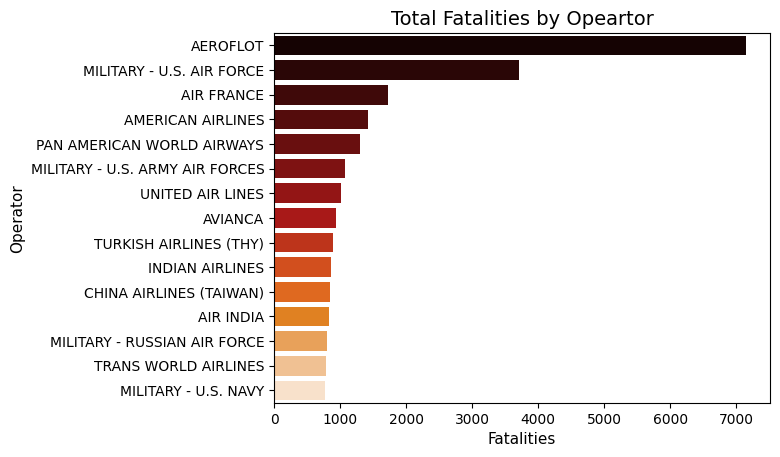

In [29]:
fatal_byop=df.groupby(df.Operator)[["Fatalities"]].sum()
fatal_byop=fatal_byop.sort_values(by="Fatalities",ascending=False).head(15)

sn.barplot(y=fatal_byop.index,x=fatal_byop.Fatalities,palette="gist_heat",orient="h")
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)

Text(0.5, 1.0, 'Total number of fight crashes by their type')

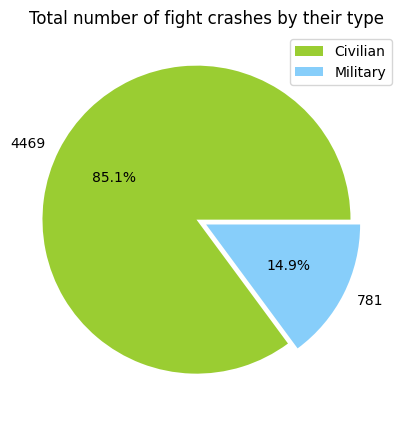

In [30]:
type1=df.copy()
type1["Military"]=type1.Operator.str.contains("MILITARY")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
color=["yellowgreen","lightskyblue"]
label=[type1["Military"].value_counts()[0],type1["Military"].value_counts()[1]]
plt.pie([type1["Military"].value_counts()[0],type1["Military"].value_counts()[1]],autopct="%1.1f%%",colors=color,explode=(0.07,0),labels=label)
plt.legend(["Civilian","Military"])
plt.title("Total number of fight crashes by their type")

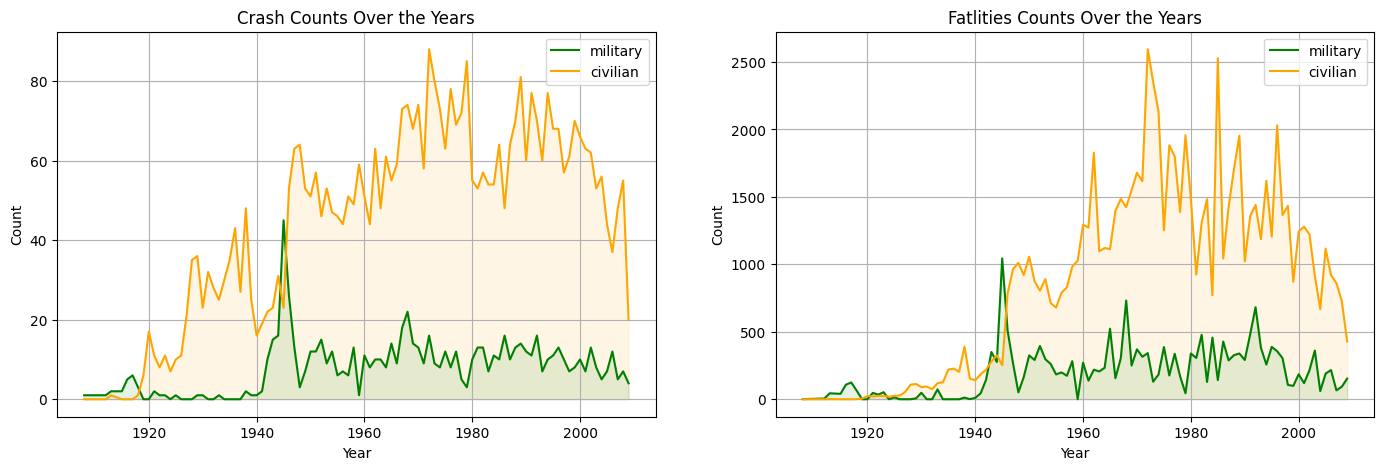

In [66]:
civilian=type1[type1["Military"] == False]
military=type1[type1["Military"] == True]
civilian_count =civilian.groupby(civilian.DateTime.dt.year)[["Time"]].count()
military_count= military.groupby(military.DateTime.dt.year)[["Time"]].count()
civilian_count.rename(columns={"Time":"civil"},inplace=True)
military_count.rename(columns={"Time":"mili"},inplace=True)
merged_data=pd.merge(military_count,civilian_count,how="outer",left_index=True,right_index=True)
merged_data.fillna(0,inplace=True)

plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.plot(merged_data.index,merged_data.mili,color="green",label="military")
plt.plot(merged_data.index,merged_data.civil,color="orange",label="civilian")
plt.fill_between(merged_data.index,merged_data.civil,color="orange",alpha=0.1)
plt.fill_between(merged_data.index,merged_data.mili,color="green",alpha=0.1)
plt.title('Crash Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

civilian_sum =civilian.groupby(civilian.DateTime.dt.year)[["Fatalities"]].sum()
military_sum= military.groupby(military.DateTime.dt.year)[["Fatalities"]].sum()
civilian_sum.rename(columns={"Fatalities":"civil falat"},inplace=True)
military_sum.rename(columns={"Fatalities":"mili fatal"},inplace=True)
merged_data2=pd.merge(military_sum,civilian_sum,how="outer",left_index=True,right_index=True)
merged_data2.fillna(0,inplace=True)

plt.subplot(1,2,2)
plt.plot(merged_data2.index,merged_data2.mili,color="green",label="military")
plt.plot(merged_data2.index,merged_data2.civil,color="orange",label="civilian")
plt.fill_between(merged_data2.index,merged_data2.civil,color="orange",alpha=0.1)
plt.fill_between(merged_data2.index,merged_data2.mili,color="green",alpha=0.1)
plt.title('Fatlities Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)